In [16]:
using PyPlot
using Interact

In [2]:
using constants
using types
include("moon.jl")
include("command-module.jl")
include("system.jl")

update (generic function with 3 methods)

In [3]:
function simulate(boost)
#     boost = 15. # m/s Change this to the correct value from the list above after everything else is done.
    position_list = Vector{Float64}[] # m
    current_time = 1.
    h = 0.1 # s, set as initial step size right now but will store current step size
    h_new = h # s, will store the adaptive step size of the next step
    mcc2_burn_done = false
    dps1_burn_done = false

    while current_time <= TOTAL_DURATION
        update(world, current_time, h)

        if !mcc2_burn_done && current_time >= 101104
            println("mcc2_burn fired")
            world.command_module.velocity -= 7.04 / norm(world.command_module.velocity) * world.command_module.velocity

            mcc2_burn_done = true
        end

        if !dps1_burn_done && current_time >= 212100
            println("dps1_burn5 fired")
            world.command_module.velocity += boost / norm(world.command_module.velocity) * world.command_module.velocity

            dps1_burn_done = true
        end

        positionE = world.command_module.positionE
        positionH = world.command_module.positionH
        velocityE = world.command_module.velocityE
        velocityH = world.command_module.velocityH

        error_amt = norm(positionE - positionH) + TOTAL_DURATION * norm(velocityE - velocityH)
        h_new = min(0.5 * MARKER_TIME, max(0.1, h * sqrt(TOLERANCE / error_amt))) # restrict step size to reasonable range

        current_time += h
        h = h_new

        push!(position_list, copy(world.command_module.position))
    end

    return position_list
end

simulate (generic function with 1 method)

In [6]:
function initialize()
    # initialization of our bodies
    global earth = Body(ME, [0.0, 0.0], RE, ORIGIN)
    global moon = Moon(MM, [0., 0.], RM, moon_position(0.0))
    global command_module = Command_Module(MCM, INITIAL_VELOCITY, 5.0, INITIAL_POSITION, INITIAL_POSITION, INITIAL_POSITION, INITIAL_VELOCITY, INITIAL_VELOCITY)
    global world = EarthMoonSystem(0.0, earth, moon, command_module)
end

function plot_simulation(boost)
    initialize()
    pos = simulate(boost)
    N = length(pos)
    x = Array(Float64,N) ; y = Array(Float64,N)

    for i in 1:length(pos)
        x[i], y[i] = pos[i]
    end
    
    grid()
    plot(x,y)
end

plot_simulation (generic function with 1 method)

Slider{Int64}([Input{Int64}] 0,"boost",0,-50:10:50)

mcc2_burn fired
dps1_burn5 fired


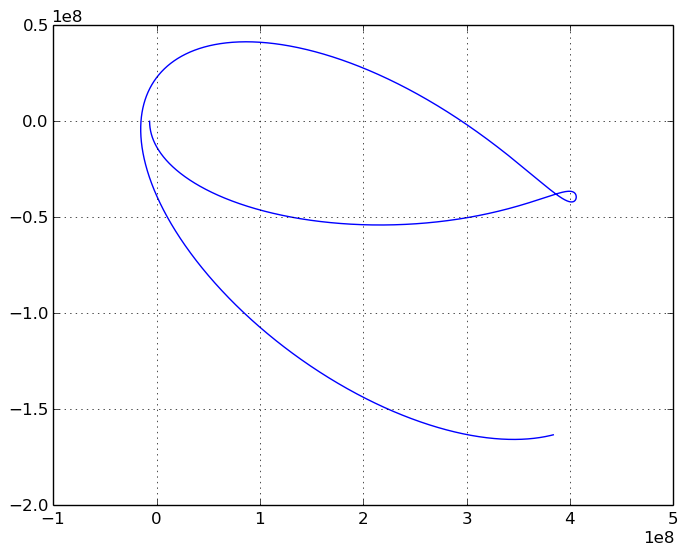

In [15]:
fig = figure()

@manipulate for boost=-50:10:50
    withfig(fig) do
        plot_simulation(boost)
    end
end

In [18]:
boost = 15.
@time simulate(boost) ;

mcc2_burn fired
dps1_burn5 fired
elapsed time: 0.004719788 seconds (3590112 bytes allocated)
